# Finite difference Taylor series
------
### The goal here is to write a program which will take in a stencil, mixed partial, and order, then tell you the coefficients you need in order to do a finite difference approximation up to the required order (or tell you that you cannot, given the specified stencil).

**Steps:**
1. From the template, create a list of tuples which represent the offsets: this will be the specified ordering of the result vector.

In [1]:
from sympy import *

In [2]:
init_printing(order='grlex')

In [204]:
template = Matrix([[1, 1, 0, 1, 1]])
# template = Matrix([[1], [1], [0], [0], [0], [0], [1]])
# template = Matrix([[0, 0, 0],
#                    [0, 0, 0],
#                    [0, 1, 0]])
order = 2
degree = 4

m, n = template.shape
k = degree + order

In [205]:
offsets = []

if not m % 2 or not n % 2:
    raise ValueError("Template dimensions must be odd")

if m is 1:
    middle = int((n - 1)/2)
    max_offset = middle
    for i in range(middle - max_offset, middle + max_offset + 1):
        if template[0, i] == 1:
            offsets.append((i - middle, 0))
            
elif n is 1:
    middle = int((m - 1)/2)
    max_offset = middle
    for j in range(middle - max_offset, middle + max_offset + 1):
        if template[j, 0] == 1:
            offsets.append((0, middle - j))
            
else:
    if m is not n:
        raise ValueError("Template matrix must be square")
    middle = int((m - 1)/2)
    max_offset = middle
    for i in range(middle - max_offset, middle + max_offset + 1):
        for j in range(middle - max_offset, middle + max_offset + 1):
            if template[j, i] == 1:
                offsets.append((i - middle, middle - j))

In [206]:
offsets = []

if not m % 2 or not n % 2:
    raise ValueError("Template dimensions must be odd")

if m is 1:
    middle = int((n - 1)/2)
    max_offset = middle
    for i in range(middle - max_offset, middle + max_offset + 1):
        if template[0, i] == 1:
            offsets.append((i - middle, 0))
            
elif n is 1:
    middle = int((m - 1)/2)
    max_offset = middle
    for j in range(middle - max_offset, middle + max_offset + 1):
        if template[j, 0] == 1:
            offsets.append((0, middle - j))
            
else:
    if m is not n:
        raise ValueError("Template matrix must be square")
    middle = int((m - 1)/2)
    max_offset = middle
    for i in range(middle - max_offset, middle + max_offset +offsets

In [197]:
offsets

In [202]:
offsets

### Construct matrix from list of offsets

In [248]:
x, y = symbols('x y')

M = Matrix()

for (i, j) in offsets:
    f = exp(i*x)*exp(j*y)
    p = expand( f.series(x, 0, k).removeO().series(y, 0, k).removeO() )
    coeffs = poly(p).terms(order='grlex')
    
    new_row = Matrix()
    for l in range(len(coeffs) - 1):
        cur_coeff = coeffs[l][1]
        new_row = new_row.row_join(Matrix([cur_coeff]))
        
    M = M.col_join(new_row)

### Compute pseudo-inverse -- if $M^+ M$ times the vector we want to invert is unchanged, we can read off the solutions from the rows of the pseudo-inverse.

In [274]:
zeros(1, k - 1)

In [286]:
d = zeros(k - 1, 1)
d[1] = 1

stencil = template
if M.pinv()*M*d == d:
    counter = 0
    for (i, j) in offsets:
        stencil[j, i + middle] = M.pinv()[1, counter]
        counter = counter + 1
        
    s = 0
    for i in range(k - 2):
        s = s + M.pinv()[1, i]
        
    stencil[0, middle] = -s

In [287]:
stencil

In [288]:
k

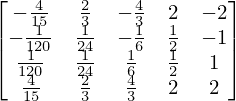

In [249]:
M

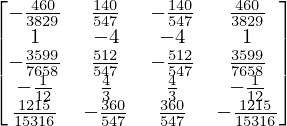

In [263]:
M.pinv()

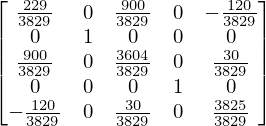

In [262]:
M.pinv()*M

In [250]:
offsets

In [117]:
x, y = symbols('x y')

M = Matrix([[]])

if m is 1:
    for i in range(1, n):
        f = exp(i*x)
        p = expand( f.series(x, 0, k).removeO() )
        coeffs = poly(p).terms(order='grlex')
        
        new_row = Matrix()
        for j in range(k - 1):
            cur_coeff = coeffs[j][1]
            new_row = new_row.col_insert(0, Matrix([[cur_coeff]]))
            
        M = M.row_insert(0, new_row)

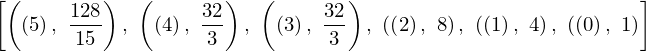

In [118]:
coeffs

In [119]:
new_row

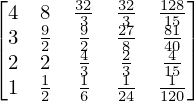

In [120]:
M

In [69]:
x, y = symbols('x y')
#f = exp(2*x)*exp(2*y)
f = exp(x)

In [70]:
expr = expand(f.series(x, 0, 4).removeO().series(y, 0, 4).removeO())

In [71]:
print(latex(expr, order='grlex'))

\frac{x^{3}}{6} + \frac{x^{2}}{2} + x + 1


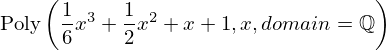

In [73]:
poly(expr)

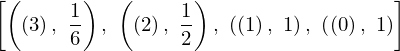

In [72]:
poly(expr).terms(order='grlex')